# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [39]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep='\t')

### Step 4. See the first 10 entries

In [18]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [24]:
print('min: ', chipo['item_price'].min(), ' max: ', chipo['item_price'].max())

min:  $1.09   max:  $9.39 


In [36]:
chipo_sorted = chipo.sort_values('item_price', ascending = True)
chipo_sorted.tail()

,order_id,quantity,item_name,choice_description,item_price
4547,1807,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39
4391,1752,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Black Beans, Pinto Beans...",$9.39
2600,1032,1,Steak Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$9.39
4241,1693,1,Steak Salad Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",$9.39
4390,1751,1,Barbacoa Salad Bowl,"[Tomatillo Green Chili Salsa, [Fajita Vegetabl...",$9.39


### Step 5. Create a histogram of the top 5 items bought

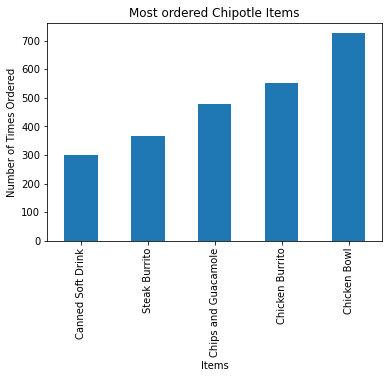

In [20]:
# this is what the solutions show, but this is not a histogram
x = chipo.item_name

letter_counts = Counter(x)

df = pd.DataFrame.from_dict(letter_counts, orient = 'index')

df = df[0].sort_values(ascending=True)[45:50]

df.plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle Items')

plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

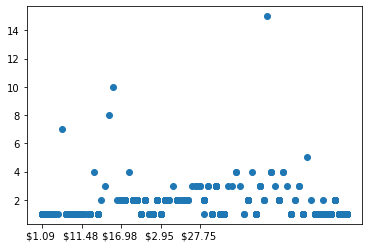

In [34]:
x = chipo_sorted['item_price']
y = chipo_sorted['quantity']
plt.scatter(x,y);
x_ticks = np.arange(0, 50, 10)
plt.xticks(x_ticks);

(0.0, 36.7)

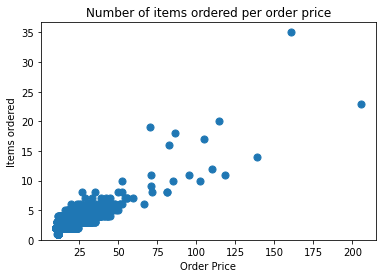

In [41]:
chipo.item_price = [float(value[1:-1]) for value in chipo.item_price]

orders = chipo.groupby('order_id').sum()

x = orders.item_price
y = orders.quantity
plt.scatter(x, y, s= 50)

plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')
plt.ylim(0)

### Step 7. BONUS: Create a question and a graph to answer your own question.
#### Question: What percentage of orders that include more than one item, include a drink?

In [60]:
#getting rid of orders that include only one purchased item
chipo["Number_items"] = chipo.groupby('order_id').size()
multItem = chipo[chipo.Number_items > 1]
multItem.head(20)

,order_id,quantity,item_name,choice_description,item_price,Number_items
1,1,1,Izze,[Clementine],3.39,4.0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2.0
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2.0
6,3,1,Side of Chips,NaN,1.69,2.0
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,2.0
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,2.0
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,2.0
10,5,1,Chips and Guacamole,NaN,4.45,2.0
11,6,1,Chicken Crispy Tacos,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75,2.0


In [68]:
#now to find the names of all the drinks and put them into a list
cheapItems = multItem[(multItem.item_price < 5)]
cheapItems.iloc[0:25]

,order_id,quantity,item_name,choice_description,item_price,Number_items
1,1,1,Izze,[Clementine],3.39,4.0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.0
6,3,1,Side of Chips,NaN,1.69,2.0
10,5,1,Chips and Guacamole,NaN,4.45,2.0
14,7,1,Chips and Guacamole,NaN,4.45,2.0
15,8,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.0
18,9,2,Canned Soda,[Sprite],2.18,4.0
20,10,1,Chips and Guacamole,NaN,4.45,4.0
22,11,1,Nantucket Nectar,[Pomegranate Cherry],3.39,2.0
24,12,1,Izze,[Grapefruit],3.39,2.0


In [74]:
drinks = ['Izze', 'Canned Soft Drink', 'Canned Soda', 'Bottled Water', 'Nantucket Nectar']

#how many unique order IDs are there?
TotalNumberOfOrders = multItem['order_id'].nunique()
TotalNumberOfOrders

736

In [96]:
# creating a list of orders that include drinks
ordersList = []

for item in multItem.item_name:
    if item in drinks:
        print(multItem.order_id[item])
# ordersList


o
q
i
c
i
N


In [92]:
multItem.loc[1:]

,order_id,quantity,item_name,choice_description,item_price,Number_items
1,1,1,Izze,[Clementine],3.39,4.0
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.0
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,2.0
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,2.0
6,3,1,Side of Chips,NaN,1.69,2.0
...,...,...,...,...,...,...
1830,740,1,Chips,NaN,2.15,2.0
1831,740,1,Canned Soft Drink,[Diet Coke],1.25,3.0
1832,741,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Sour Cream,...",21.96,2.0
1833,742,1,Veggie Bowl,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.49,2.0


In [ ]:
percentWithDrinks = ordersWithDrinks / TotalNumberOfOrders *100
print('The percentage of multi-item orders that included a drink is ', round(percentWithDrinks, 2)